In [11]:
import numpy as np
from scipy.integrate import odeint
from numpy import sin, cos, arctan
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

# Начальные условия

In [29]:
N = 3

In [30]:
m = [1 for _ in range(N)]
# m[4] = 10
G = 1


X0 = [
    0, # x_1
    2, # Vx_1
    2, # y_1
    -1, # Vy_1
    0, # x_2
    -2, # Vx_2
    -3, # y_2
    1 # Vy_2
]

X0 = [np.random.uniform(-2,2) for _ in range(N*4)]

t = np.linspace(0,25,101)

# Решение

## Функция системы

In [31]:
def DE(X, t):
    dxdt = [0.0 for _ in range(N*4)] 
    
    for i in range(N * 4):
        if (i % 2) == 0:
            dxdt[i] = X[i+1]
        elif (i % 4) == 1:
            for j in range(1,N*4,4):
                if i != j:
                    dxdt[i] += G * m[j//4] * (X[j-1]-X[i-1]) * ((X[j-1]-X[i-1])**2 + (X[j+1]-X[i+1])**2)**(-3/2)
        elif (i%4) == 3:
            for j in range(3,N*4,4):
                if i != j:
                    dxdt[i] += G * m[j//4] * (X[j-1]-X[i-1]) * ((X[j-3]-X[i-3])**2 + (X[j-1]-X[i-1])**2)**(-3/2)
        else:
            print(i)
#     print(dxdt[1::2])
    return dxdt

## Интегрирование

In [32]:
Vcosm = np.sqrt(G*sum(m)/9)

In [37]:
X0 = [
    -2, # x_1
    0, # Vx_1
    0, # y_1
    Vcosm, # Vy_1
    
    0, # x_2
    Vcosm, # Vx_2
    2, # y_2
    0, # Vy_2
    
    2, # x_Vcosm
    0, # Vx_Vcosm
    0, # y_Vcosm
    -Vcosm, # Vy_Vcosm
    
    #0, # x_4
    #-Vcosm, # Vx_4
    #-2, # y_4
    #0, # Vy_4
]

In [45]:
res = odeint(DE, X0, t)
res[0]

array([-2.        ,  0.        ,  0.        ,  0.57735027,  0.        ,
        0.57735027,  2.        ,  0.        ,  2.        ,  0.        ,
        0.        , -0.57735027])

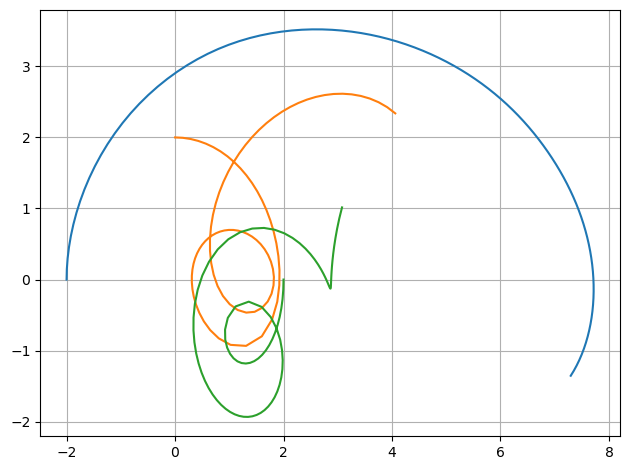

In [40]:
fig, ax = plt.subplots(1,1)
ax.grid()

for i in range(0, N*4, 4):
    sns.lineplot(ax=ax, x=res[:,i], y=res[:,i+2], sort=False);

plt.tight_layout()

In [48]:
df = pd.DataFrame()
df["t"] = t
for i in range(N):
    df[f"X{i}"]  = res[:, i*4 + 0]
    df[f"Vx{i}"] = res[:, i*4 + 1]
    df[f"Y{i}"]  = res[:, i*4 + 2]
    df[f"Vy{i}"] = res[:, i*4 + 3]
df.to_csv("result.csv")